# Question 1
Hidden layer weights: $W_1$, bias: $b_1$

Output layer weights: $W_2$, bias: $b_2$ 

Output of hidden layer: $z_1=W_1x+b_1$

After activation function: $a_1=g(z_1)$

Output of second layer: $z_2=W_2a_1+b_2$

After activation function: $\hat y=a_2=z_2$

Loss:  $L=\frac{1}{2}\sum_{i=1}^{N}(y_i-\hat y_i)^2$

## Output layer update rule
\begin{align}
\frac {\partial L}{\partial W_2}&=\frac {\partial (0.5(y-\hat y)^2)}{\partial W_2}\\
&=0.5\frac {\partial (y^2-2y\hat y+\hat y^2)}{\partial W_2}\\
&={0.5\frac {\partial \hat y^2}{\partial W_2}-y\frac {\partial \hat y}{\partial W_2}}\quad 
\end{align}
Since we have $\hat y = a_2=z_2$ in the output layer,
\begin{align}
\frac {\partial L}{\partial W_2}&=0.5\frac {\partial \hat y^2}{\partial \hat y}\frac {\partial \hat y}{\partial  z_2}\frac {\partial z_2}{\partial W_2}-y\frac {\partial \hat y}{\partial  z_2}\frac {\partial z_2}{\partial W_2}\\
&=\hat y \cdot 1 \cdot  \frac {\partial (W_2a_1+b_2)}{\partial W_2}-y\cdot 1\cdot \frac {\partial (W_2a_1+b_2)}{\partial W_2} \\
&=\color{red}{(\hat y - y)a_1^T}
\end{align}
Similarily,
\begin{align}
\frac {\partial L}{\partial b_2}&=0.5\frac {\partial \hat y^2}{\partial \hat y}\frac {\partial \hat y}{\partial  z_2}\frac {\partial z_2}{\partial b_2}-y\frac {\partial \hat y}{\partial  z_2}\frac {\partial z_2}{\partial b_2}\\
&=\hat y \cdot 1 \cdot  \frac {\partial (W_2a_1+b_2)}{\partial b_2}-y\cdot 1\cdot \frac {\partial (W_2a_1+b_2)}{\partial b_2}\\
&=\color{red}{(\hat y-y)}
\end{align}
## Hidden layer update rule
\begin{align}
\frac {\partial L}{\partial W_1}&=\frac {\partial (0.5(y-\hat y)^2)}{\partial W_1}\\
&=0.5\frac {\partial (y^2-2y\hat y+\hat y^2)}{\partial W_1}\\
&=0.5\frac {\partial \hat y^2}{\partial W_1}-y\frac {\partial \hat y}{\partial W_1}\\
&= 0.5\frac {\partial \hat y^2}{\partial z_2}\frac {\partial z_2}{\partial a_1}\frac {\partial a_1}{\partial z_1}\frac {\partial z_1}{\partial W_1}-y\frac {\partial \hat y}{\partial z_2}\frac {\partial z_2}{\partial a_1}\frac {\partial a_1}{\partial z_1}\frac {\partial z_1}{\partial W_1}\\
&=\hat y\cdot W_2\cdot g'(z_1)\cdot x-y\cdot W_2\cdot g'(z_1)\cdot x\\
&=\color{red}{(\hat y-y) W_2 g'(z_1)x}
\end{align}
Resort the term to match the dimension, we could have
$$\color{red}{\frac {\partial L}{\partial W_1}=W_2^T(\hat y-y)*g'(z_1)x^T}$$
where * denotes element-wise production

Similarily,
\begin{align}
\frac {\partial L}{\partial b_1}&=\frac {\partial (0.5(y-\hat y)^2)}{\partial b_1}\\
&=0.5\frac {\partial (y^2-2y\hat y+\hat y^2)}{\partial W_1}\\
&=0.5\frac {\partial \hat y^2}{\partial b_1}-y\frac {\partial \hat y}{\partial b_1}\\
&= 0.5\frac {\partial \hat y^2}{\partial z_2}\frac {\partial z_2}{\partial a_1}\frac {\partial a_1}{\partial z_1}\frac {\partial z_1}{\partial b_1}-y\frac {\partial \hat y}{\partial z_2}\frac {\partial z_2}{\partial a_1}\frac {\partial a_1}{\partial z_1}\frac {\partial z_1}{\partial b_1}\\
&=\hat y\cdot W_2\cdot g'(z_1)\cdot 1-y\cdot W_2\cdot g'(z_1)\cdot 1\\
&=\color{red}{(\hat y-y) W_2 g'(z_1)}
\end{align}
Resort the term to match the dimension, we could have
$$\color{red}{\frac {\partial L}{\partial b_1}=W_2^T(\hat y-y)*g'(z_1)}$$
where * denotes element-wise production

## Difference between this and binary classification using log loss

The loss function are different. This will make the $\frac{\partial L}{\partial a_2}$ different, and will further make the update rule different.
The activation function for the output layer for the binary classification will make the update rule differnt.

# Qestion 2

## Model setup

In [38]:
import numpy as np
from matplotlib import pyplot as plt

def loss_func(y,y_hat):
    y=y.T
    L = np.sum(np.power(y_hat-y,2))/np.shape(y)[1]
    return L

def sigmoid_func(z):
    return 1./(1+np.exp(-z))

def g_gradient_func(z):
    return sigmoid_func(z)*(1-sigmoid_func(z))

def pred(X,W1,b1,W2,b2):
    X = X.T
    Z1 = np.dot(W1,X)+b1
    A1 = sigmoid_func(Z1)
    y_hat = np.dot(W2,A1)+b2
    return y_hat

def bp2(X,y,y_hat,W1,b1):
    X = X.T
    y = y.T
    Z1 = np.dot(W1,X)+b1
    A1 = sigmoid_func(Z1)
    num = np.shape(y)[1]
    dZ2 = y_hat - y
    db2 = 1/num*np.sum(dZ2,axis = 1, keepdims = True)
    dW2 = 1/num*np.dot(dZ2,A1.T)
    return dW2,db2

def bp1(X,y,y_hat,W1,b1,W2):
    X = X.T
    y = y.T
    Z1 = np.dot(W1,X)+b1
    A1 = sigmoid_func(Z1)
    num = np.shape(y)[1]
    dZ2 = y_hat - y
    dZ1 = np.dot(W2.T,dZ2)*g_gradient_func(Z1)
    dW1 = 1/num*np.dot(dZ1,X.T)
    db1 = 1/num*np.sum(dZ1,axis = 1, keepdims = True)
    return dW1, db1

def backprop_func(X, y, W1, b1, W2, b2, alpha, epoch,x_test,y_test):
    obj = []
    obj_tst = []
    y_hat = pred(X,W1,b1,W2,b2)
    obj_val = loss_func(y,y_hat)
    obj.append(obj_val)
    y_hat_tst = pred(X_test,W1,b1,W2,b2)
    obj_val2 = loss_func(y_test,y_hat_tst)
    obj_tst.append(obj_val2)
    for i in range(epoch):
        y_hat = pred(X,W1,b1,W2,b2)
        dW2, db2 = bp2(X,y, y_hat, W1, b1)
        dW1, db1 = bp1(X,y,y_hat,W1,b1,W2)
        W2 = W2-alpha*dW2
        b2 = b2-alpha*db2
        W1 = W1-alpha*dW1
        b1 = b1-alpha*db1
        obj_val = loss_func(y,y_hat)
        obj.append(obj_val)
        y_hat_tst = pred(X_test,W1,b1,W2,b2)
        obj_val2 = loss_func(y_test,y_hat_tst)
        obj_tst.append(obj_val2)
    return W1,b1,W2,b2,obj,obj_tst

In [35]:
X_train = np.loadtxt(r"X_train.csv")
Y_train = np.loadtxt(r"Y_train.csv")
Y_train = Y_train.reshape(Y_train.shape[0],1)
X_test = np.loadtxt(r"X_test.csv")
Y_test = np.loadtxt(r"Y_test.csv")
Y_test = Y_test.reshape(Y_test.shape[0],1)


### setups

number of neurons: 15

epoch: 100000

alpha: 0.001

In [40]:
num_samples, num_features = X_train.shape
h1 = 15
h2 = 1
epoch = 100000
alpha = 0.001

np.random.seed(1)

# initialization
W1 = np.random.rand(h1,num_features)
b1 = np.random.rand(h1,1)
W2 = np.random.rand(h2,h1)
b2 = np.random.rand(h2,1)

# train the model
W1,b1,W2,b2,obj_train,obj_test = backprop_func(X_train,Y_train,W1,b1,W2,b2,alpha,epoch,X_test,Y_test)

# testing
Y_hat = pred(X_test,W1,b1,W2,b2)
obj_test_final = loss_func(Y_test,Y_hat)

# print(obj_train)
# print(obj_test)
                                 

In [42]:
# Average MSE for training set and testing set

print('Average MSE for training set is {0:.2f}'.format(obj_train[-1]))
print('Average MSE for training set is {0:.2f}'.format(obj_test[-1]))

Average MSE for training set is 3.19
Average MSE for training set is 53.50


## Answers

### 2.1

For this dataset, I'm using identity function because this is a standard regression problem.

### 2.2
There should be one neuron in the output layer, because the output value is a single value for each sample.

### 2.3

The average MSE for the training set is 3.19, for the testing set is 53.50. The results are in the last cell.

### 2.4


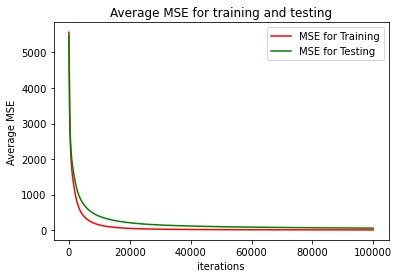

In [46]:
plt.plot(obj_train,color = 'r',label = "MSE for Training")
plt.plot(obj_test,color = 'g',label = "MSE for Testing")
plt.xlabel('iterations')
plt.ylabel('Average MSE')
plt.title('Average MSE for training and testing')
plt.legend(loc = "best")
plt.show()

### 2.5

Average MSE for training set is 3.25 with alpha = 0.001
Average MSE for training set is 54.12 with alpha = 0.001
Average MSE for training set is 0.02 with alpha = 0.01
Average MSE for training set is 16.74 with alpha = 0.01
Average MSE for training set is 0.02 with alpha = 0.1
Average MSE for training set is 12.62 with alpha = 0.1


C:\Users\ziyazha\AppData\Local\Temp/ipykernel_35440/616579933.py:10: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-z))


Average MSE for training set is 563.81 with alpha = 1.0
Average MSE for training set is 987.56 with alpha = 1.0


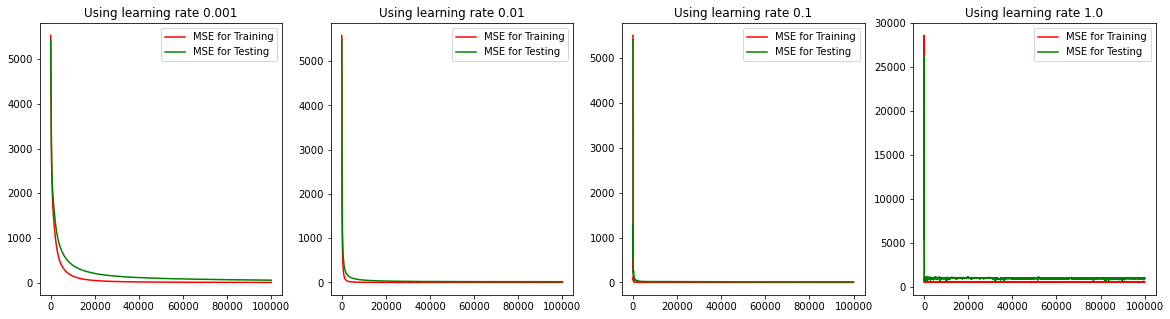

In [48]:
def init():
    W1 = np.random.rand(h1,num_features)
    b1 = np.random.rand(h1,1)
    W2 = np.random.rand(h2,h1)
    b2 = np.random.rand(h2,1)
    return W1,b1,W2,b2

# training for alpha = 0.001
W1,b1,W2,b2 = init()
W1,b1,W2,b2,obj_train1,obj_test1 = backprop_func(X_train,Y_train,W1,b1,W2,b2,0.001,epoch,X_test,Y_test)

print('Average MSE for training set is {0:.2f} with alpha = 0.001'.format(obj_train1[-1]))
print('Average MSE for training set is {0:.2f} with alpha = 0.001'.format(obj_test1[-1]))

# training for alpha = 0.01
W1,b1,W2,b2 = init()
W1,b1,W2,b2,obj_train2,obj_test2 = backprop_func(X_train,Y_train,W1,b1,W2,b2,0.01,epoch,X_test,Y_test)

print('Average MSE for training set is {0:.2f} with alpha = 0.01'.format(obj_train2[-1]))
print('Average MSE for training set is {0:.2f} with alpha = 0.01'.format(obj_test2[-1]))

# training for alpha = 0.1
W1,b1,W2,b2 = init()
W1,b1,W2,b2,obj_train3,obj_test3 = backprop_func(X_train,Y_train,W1,b1,W2,b2,0.1,epoch,X_test,Y_test)

print('Average MSE for training set is {0:.2f} with alpha = 0.1'.format(obj_train3[-1]))
print('Average MSE for training set is {0:.2f} with alpha = 0.1'.format(obj_test3[-1]))

# training for alpha = 1
W1,b1,W2,b2 = init()
W1,b1,W2,b2,obj_train4,obj_test4 = backprop_func(X_train,Y_train,W1,b1,W2,b2,1.0,epoch,X_test,Y_test)

print('Average MSE for training set is {0:.2f} with alpha = 1.0'.format(obj_train4[-1]))
print('Average MSE for training set is {0:.2f} with alpha = 1.0'.format(obj_test4[-1]))


plt.figure(2,figsize=(20,5))
ax0 = plt.subplot(141)
plt.plot(obj_train1,color = 'r',label = "MSE for Training")
plt.plot(obj_test1,color = 'g',label = "MSE for Testing")
plt.legend(loc = "best")
ax0.title.set_text("Using learning rate 0.001")

ax1 = plt.subplot(142)
plt.plot(obj_train2,color = 'r',label = "MSE for Training")
plt.plot(obj_test2,color = 'g',label = "MSE for Testing")
plt.legend(loc = "best")
ax1.title.set_text("Using learning rate 0.01")

ax2 = plt.subplot(143)
plt.plot(obj_train3,color = 'r',label = "MSE for Training")
plt.plot(obj_test3,color = 'g',label = "MSE for Testing")
plt.legend(loc = "best")
ax2.title.set_text("Using learning rate 0.1")

ax3 = plt.subplot(144)
plt.plot(obj_train4,color = 'r',label = "MSE for Training")
plt.plot(obj_test4,color = 'g',label = "MSE for Testing")
plt.legend(loc = "best")
ax3.title.set_text("Using learning rate 1.0")


From the figures above, we can see with the learning rate increasing, the convergence speed will become faster but the average MSE would be too large if the learning rate is too large (like alpha = 1.0, the average MSE would be 563 on training set and 987 on testing set).

## 2.6


In [52]:
num_hidden_layer = [i+1 for i in range(10)]
final_obj_train = []
final_obj_test = []

for i in range(10):
    num_samples, num_features = X_train.shape

    h1 = num_hidden_layer[i]
    h2 = 1
    epoch = 20000
    learning_rate = 0.01
    
    np.random.seed(1)
    
    W1,b1,W2,b2 = init()
    
    W1,b1,W2,b2,obj_train,obj_test = backprop_func(X_train,Y_train,W1,b1,W2,b2,learning_rate,epoch,X_test,Y_test)
    
    final_obj_train.append(obj_train[-1])
    final_obj_test.append(obj_test[-1])


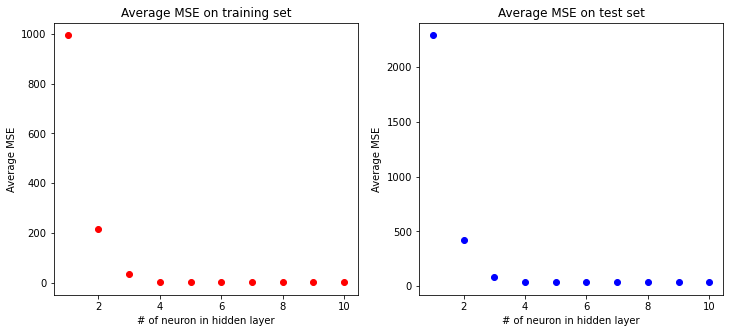

In [54]:
plt.figure(3,figsize=(12,5))
ax0 = plt.subplot(121)
plt.scatter(np.linspace(1,10,10),final_obj_train,color = 'red')
plt.xlabel('# of neuron in hidden layer')
plt.ylabel('Average MSE')
ax0.title.set_text("Average MSE on training set")

ax1 = plt.subplot(122)
plt.scatter(np.linspace(1,10,10),final_obj_test,color='blue')
plt.xlabel('# of neuron in hidden layer')
plt.ylabel('Average MSE')
ax1.title.set_text("Average MSE on test set")

#### 2.6.a

The update rule don't need to change, because the change in the shape for the hidden layer don't influence the updating.

#### 2.6.b

The average will decrese with the number of neurons incresing, when the other hyper parameters are the same for the model. This indicates that, the model with more neurons can better learn the data distribution, or the correlation between input and output.

## 2.7

### 2.7.a

Yes.

### 2.7.b

In the experiment, I only need to change the activation function and the deviation of the activation.

### 2.7.c

Please see the following content.

### Linear activation function

Average MSE for training set is 3.29 with Linear activation function
Average MSE for training set is 55.48 with Linear activation function


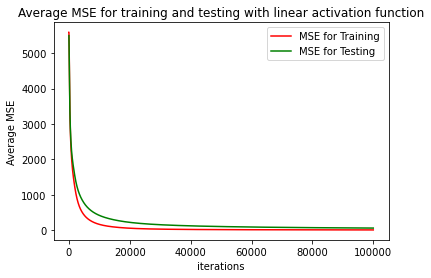

In [56]:
def g(z):
    return z

def g_gradient(z):
    return 1

h1 = 10
h2 = 1
epoch = 100000
learning_rate = 0.001

W1,b1,W2,b2 = init()
W1,b1,W2,b2,obj_train,obj_test = backprop_func(X_train,Y_train,W1,b1,W2,b2,learning_rate,epoch,X_test,Y_test)

print('Average MSE for training set is {0:.2f} with Linear activation function'.format(obj_train[-1]))
print('Average MSE for training set is {0:.2f} with Linear activation function'.format(obj_test[-1]))

plt.plot(obj_train,color = 'r',label = "MSE for Training")
plt.plot(obj_test,color = 'g',label = "MSE for Testing")
plt.xlabel('iterations')
plt.ylabel('Average MSE')
plt.title('Average MSE for training and testing with linear activation function')
plt.legend(loc = "best")
plt.show()

### Relu

Average MSE for training set is 3.75 with ReLU activation function
Average MSE for training set is 56.33 with ReLU activation function


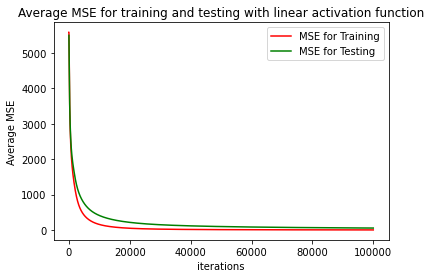

In [57]:
def g(z):
  g = np.maximum(z,0)
  return g

def g_gradient(z):
  z[z<0] = 0
  z[z>=0] = 1
  return z

W1,b1,W2,b2 = init()
W1,b1,W2,b2,obj_train,obj_test = backprop_func(X_train,Y_train,W1,b1,W2,b2,learning_rate,epoch,X_test,Y_test)

print('Average MSE for training set is {0:.2f} with ReLU activation function'.format(obj_train[-1]))
print('Average MSE for training set is {0:.2f} with ReLU activation function'.format(obj_test[-1]))

plt.plot(obj_train,color = 'r',label = "MSE for Training")
plt.plot(obj_test,color = 'g',label = "MSE for Testing")
plt.xlabel('iterations')
plt.ylabel('Average MSE')
plt.title('Average MSE for training and testing with linear activation function')
plt.legend(loc = "best")
plt.show()

The convergence speed will be different with different activation function. From the figure I get, the linear activation function converge faster. Besides, the performance of the model may be different when we choose differen activation function (but here the difference is not very obvious).